In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
y_preds = np.load("../data/y_preds.npz.npy")

In [5]:
b = np.mean(y_preds, axis = 0)
idx = b.argsort()
y_preds_sorted = np.take(y_preds, idx, axis=1)

/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:121: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


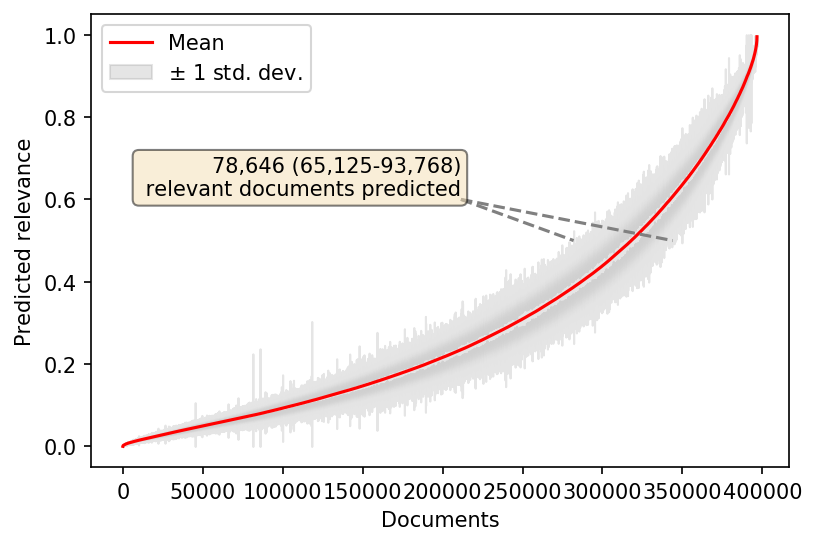

In [7]:
fig, ax = plt.subplots(dpi=150)

mean_pred = np.mean(y_preds_sorted, axis=0)
std_pred = np.std(y_preds_sorted, axis=0)

ax.plot(mean_pred, color='r', label="Mean")

preds_upper = np.minimum(mean_pred + std_pred, 1)
preds_lower = np.maximum(mean_pred - std_pred, 0)

ax.fill_between(range(len(mean_pred)), preds_upper, preds_lower, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

lb = preds_upper[np.where(preds_upper>0.5)].shape[0]
ub = preds_lower[np.where(preds_lower>0.5)].shape[0]
mb = mean_pred[np.where(mean_pred>0.5)].shape[0]

s = f'{mb:,} ({ub:,}-{lb:,})\n relevant documents predicted'

ax.plot([np.argwhere(preds_upper>0.5)[0][0]*0.75,np.argwhere(preds_upper>0.5)[0][0]],[0.6,0.5],c="grey",ls="--")
ax.plot([np.argwhere(preds_upper>0.5)[0][0]*0.75,np.argwhere((preds_lower>0.5) & (preds_lower < 0.501))[-1][0]],[0.6,0.5],c="grey",ls="--")
ax.text(np.argwhere(preds_upper>0.5)[0][0]*0.75,0.6,s,ha="right",va="bottom",bbox=props)

ax.set_xlabel('Documents')
ax.set_ylabel('Predicted relevance')

ax.legend()
plt.savefig(f'../plots/prediction_models/predictions_unseen.png',bbox_inches="tight")
plt.savefig(f'../plots/prediction_models/predictions_unseen.pdf',bbox_inches="tight")